<a href="https://colab.research.google.com/github/amyboucher/hello-world/blob/master/Mole_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# is it a mole or not??


In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [17]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from google.colab.patches import cv2_imshow

from keras import optimizers
from keras.models import Model
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!unzip /content/drive/My\ Drive/mole-vs-not.zip


In [0]:
datagen = ImageDataGenerator(
            rotation_range=40,          #values in degree, range of random rotation
            width_shift_range=0.2,      #shift_range radomly shifts the image horizontally or vertically
            height_shift_range=0.2,
            rescale=1./255,             #normalises the values as 255 is too large for our model to process
            shear_range=0.2,            #randomly applies shear trims
            zoom_range=0.2,             #randomly zooms in on image 
            horizontal_flip=True) 

In [0]:
# BUILD THE MODEL
def create_model():
    # Channels first tells the pooling layer to use the (Height, Width, Depth) format instead of the (Depth, Height, Width)
    data_format="channels_first"

    # A sequential model is a basic model structure where the layers are stacked layer by layer. 
    # Another option with keras is a functional model, layers can be connected to literally any other layer within the model.
    model = Sequential()
    # A convolutional layer slides a filter over the image which is fed to the activation layer so the model can learn
    # features and activate when they see one of these visual features. Only activated features are carried over to the 
    # next layer.
    model.add(Convolution2D(32, (3, 3), input_shape=(150, 150, 3)))
    # Relu maps all negative values to 0 and keeps all positive values.
    model.add(Activation('relu'))
    model.add(MaxPooling2D(data_format=data_format, pool_size=(2, 2)))

    model.add(Convolution2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(data_format=data_format, pool_size=(2, 2)))

    model.add(Convolution2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(data_format=data_format, pool_size=(2, 2)))

    # Squashes the output of the previous layer to an array with 1 dimension
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(optimizer='rmsprop',              # Performs gradient descent, finding the lowest error value
                  loss='binary_crossentropy',       # Cross entropy measures the performance of each prediction made by the network
                  metrics=['accuracy'])
    
    return model

In [20]:
batch_size = 16
train_samples = 2000
validation_samples = 800

# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# This is a generator that will read pictures found in
# subfolers of 'train/', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    'train',                  # The path where the training data is
    target_size=(150, 150),        # The width and height of the images after resizing, also the input of the first layer in our network
    batch_size=batch_size,         # The number of samples processed before the model is updated
    class_mode='binary')           # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [34]:
model = create_model()
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 16s 130ms/step - loss: 0.7956 - acc: 0.4945 - val_loss: 0.6904 - val_acc: 0.5375
Epoch 2/50
125/125 [==============================] - 15s 117ms/step - loss: 0.6942 - acc: 0.5700 - val_loss: 0.6651 - val_acc: 0.5975
Epoch 3/50
125/125 [==============================] - 15s 119ms/step - loss: 0.6760 - acc: 0.6020 - val_loss: 0.6523 - val_acc: 0.6687
Epoch 4/50
125/125 [==============================] - 15s 117ms/step - loss: 0.6620 - acc: 0.6145 - val_loss: 0.6935 - val_acc: 0.6075
Epoch 5/50
125/125 [==============================] - 14s 110ms/step - loss: 0.6528 - acc: 0.6260 - val_loss: 0.5999 - val_acc: 0.7188
Epoch 6/50
125/125 [==============================] - 16s 125ms/step - loss: 0.6369 - acc: 0.6550 - val_loss: 0.6170 - val_acc: 0.6787
Epoch 7/50
125/125 [==============================] - 15s 119ms/step - loss: 0.6391 - acc: 0.6435 - val_loss: 0.5783 - val_acc: 0.7037
Epoch 8/50
125/125 [==============================] - 1

In [0]:
model.save_weights("mole-not-mole.h5")

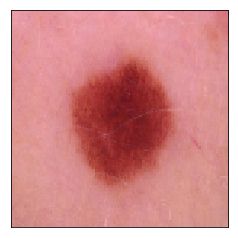

The image above is a MOLE!


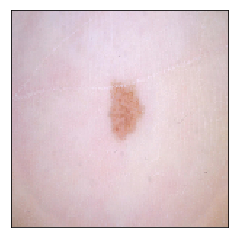

The image above is a MOLE!


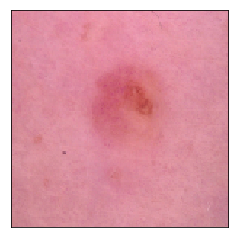

The image above is a MOLE!


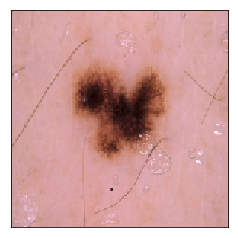

The image above is a MOLE!


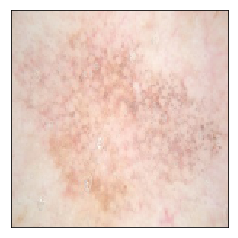

The image above is a MOLE!


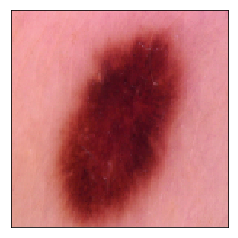

The image above is a MOLE!


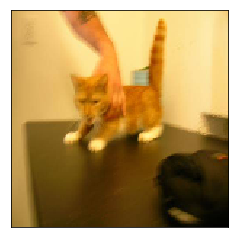

The image above is a NOT a MOLE!


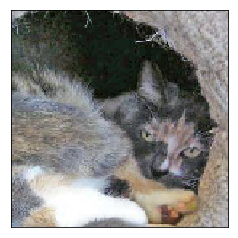

The image above is a MOLE!


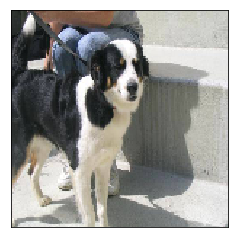

The image above is a NOT a MOLE!


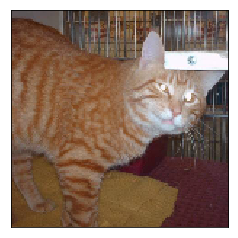

The image above is a NOT a MOLE!


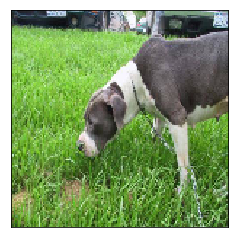

The image above is a NOT a MOLE!


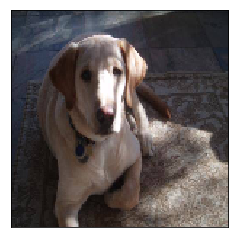

The image above is a NOT a MOLE!


In [36]:
WEIGHTS_FILE = 'mole-not-mole.h5'

model = create_model()
model.load_weights(WEIGHTS_FILE)


MOLE_IMAGES = ['mole-vs-not/train/mole/17.jpg', 
              'mole-vs-not/train/mole/170.jpg',
              'mole-vs-not/train/mole/169.jpg',
              'mole-vs-not/train/mole/1700.jpg',
              'mole-vs-not/train/mole/18.jpg',
              'mole-vs-not/train/mole/183.jpg']

NOTMOLE_IMAGES = ['mole-vs-not/train/not-mole/cat.0.jpg',
              'mole-vs-not/train/not-mole/cat.1003.jpg',
              'mole-vs-not/train/not-mole/dog.2485.jpg',
              'mole-vs-not/train/not-mole/cat.1024.jpg',
              'mole-vs-not/train/not-mole/dog.2931.jpg',
              'mole-vs-not/train/not-mole/dog.293.jpg']

# /content/mole-vs-not/test/mole/1.jpg

def test_model(array_of_images, model):
    # Loop through the array of images
    for i in range(0, len(array_of_images)):
        # Load the image and resize it to the network input layer (150, 150)
        img = load_img(array_of_images[i], target_size=(150,150))
        
        # Remove the plot x and y ticks
        plt.xticks([])
        plt.yticks([])
        
        # Show the image
        plt.imshow(img)
        plt.show()
        
        # Do transformations on the image so that it can be input as an argument to
        # the model prediction
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)
        img_classes = model.predict_classes(img)
        
        if img_classes[0] == 0:
            print("The image above is a MOLE!")
        else:
            print("The image above is a NOT a MOLE!")

test_model(MOLE_IMAGES, model)
test_model(NOTMOLE_IMAGES, model)